In [1]:
%reset -f

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
X,y = mnist.data.values, mnist.target
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

/Users/amit.kumar/miniconda3/envs/poc/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)

PCA()

In [4]:
import numpy as np
cumsum = np.cumsum(pca.explained_variance_ratio_)

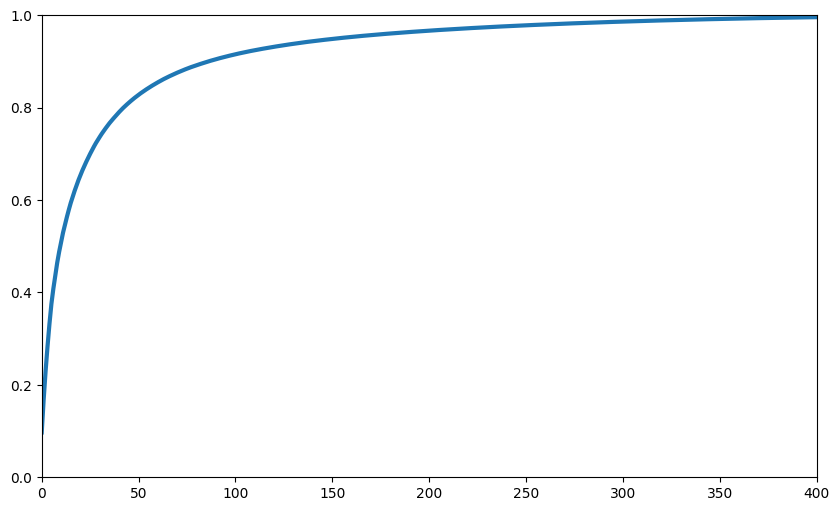

In [5]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 6))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.show()

In [6]:
pca = PCA(n_components=0.95)
X_reduced_train = pca.fit_transform(X_train)
X_reduced_test = pca.transform(X_test)

In [7]:
pca.n_components_

154

In [8]:
pca.explained_variance_ratio_.sum() 

0.9501960192613037

In [9]:
%%time
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train,y_train)

CPU times: user 26.1 s, sys: 1.26 s, total: 27.4 s
Wall time: 30.3 s


RandomForestClassifier(random_state=42)

In [10]:
%%time
from sklearn.metrics import accuracy_score
pred_train = forest_clf.predict(X_train)
print("Accuracy score on train : ",accuracy_score(y_train,pred_train))

pred_test = forest_clf.predict(X_test)
print("Accuracy score on test : ",accuracy_score(y_test,pred_test))

Accuracy score on train :  1.0
Accuracy score on test :  0.9705
CPU times: user 1.15 s, sys: 33.1 ms, total: 1.18 s
Wall time: 1.18 s


In [11]:
%%time
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_reduced_train,y_train)

CPU times: user 1min 18s, sys: 242 ms, total: 1min 18s
Wall time: 1min 18s


RandomForestClassifier(random_state=42)

In [12]:
%%time
from sklearn.metrics import accuracy_score
pred_train = forest_clf.predict(X_reduced_train)
print("Accuracy score on train : ",accuracy_score(y_train,pred_train))

pred_test = forest_clf.predict(X_reduced_test)
print("Accuracy score on test : ",accuracy_score(y_test,pred_test))

Accuracy score on train :  1.0
Accuracy score on test :  0.9481
CPU times: user 1.1 s, sys: 30.5 ms, total: 1.14 s
Wall time: 1.13 s


In [13]:
X_reduced_train.shape

(60000, 154)

In [14]:
X_reduced_test.shape

(10000, 154)

In [15]:
%%time 
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train)

CPU times: user 1min 48s, sys: 462 ms, total: 1min 49s
Wall time: 1min 49s


SGDClassifier(random_state=42)

In [16]:
%%time
from sklearn.metrics import accuracy_score
pred_train = sgd_clf.predict(X_train)
print("Accuracy score on train : ",accuracy_score(y_train,pred_train))

pred_test = sgd_clf.predict(X_test)
print("Accuracy score on test : ",accuracy_score(y_test,pred_test))

Accuracy score on train :  0.8807666666666667
Accuracy score on test :  0.874
CPU times: user 374 ms, sys: 286 ms, total: 659 ms
Wall time: 108 ms


In [17]:
%%time 
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_reduced_train,y_train)

CPU times: user 25 s, sys: 1.1 s, total: 26.1 s
Wall time: 24.3 s


SGDClassifier(random_state=42)

In [18]:
%%time
from sklearn.metrics import accuracy_score
pred_train = sgd_clf.predict(X_reduced_train)
print("Accuracy score on train : ",accuracy_score(y_train,pred_train))

pred_test = sgd_clf.predict(X_reduced_test)
print("Accuracy score on test : ",accuracy_score(y_test,pred_test))

Accuracy score on train :  0.8929
Accuracy score on test :  0.8959
CPU times: user 162 ms, sys: 171 ms, total: 333 ms
Wall time: 49.3 ms


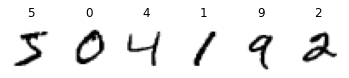

In [70]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,6)
for i in range(6):
    ax[i].imshow(X_train[i:i+1,:].reshape(28,28), cmap="binary")
    ax[i].axis("off")
    ax[i].set_title(str(y_train.values[i:i+1][0]))

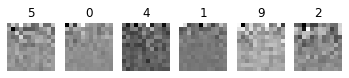

In [71]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,6)
for i in range(6):
    ax[i].imshow(X_reduced_train[i:i+1,:144].reshape(12,12), cmap="binary")
    ax[i].axis("off")
    ax[i].set_title(str(y_train.values[i:i+1][0]))

## PCA

/Users/amit.kumar/miniconda3/envs/poc/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/Users/amit.kumar/miniconda3/envs/poc/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


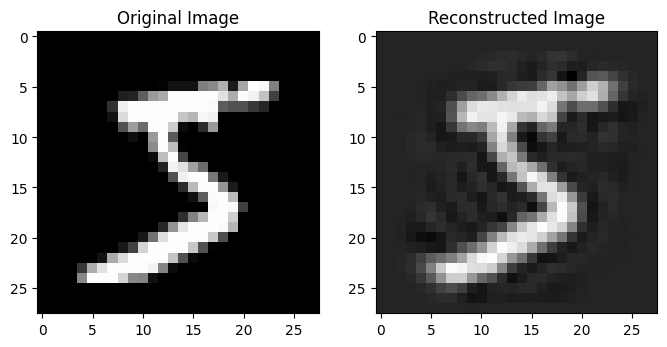

In [21]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

# Load MNIST data
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

# Select a single image (using .iloc for proper indexing)
single_image = X.iloc[0].to_numpy().reshape(1, -1)  # Convert the first row to a NumPy array and reshape it

# Apply PCA
pca = PCA(n_components=154)  # 154 is a common choice for MNIST
pca.fit(X)  # Fit to the whole dataset to understand the overall structure
compressed_image = pca.transform(single_image)  # Transform the single image

# Reconstruct the image from the compressed version
reconstructed_image = pca.inverse_transform(compressed_image)

# Plotting original and reconstructed image
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(single_image.reshape(28, 28), cmap='gray')
axes[0].set_title('Original Image')
axes[1].imshow(reconstructed_image.reshape(28, 28), cmap='gray')
axes[1].set_title('Reconstructed Image')
plt.show()
